<a href="https://colab.research.google.com/github/Diablo999-hub/TelecomX_alura/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#游늷 Extracci칩n

## **Importando librerias**

In [1]:
import requests, json, pandas as pd, numpy as np

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#游댢 Transformaci칩n

In [3]:
df_normalizado = pd.json_normalize(data)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

**Diccionario de datos**
*   customerID: n칰mero de identificaci칩n 칰nico de cada cliente
*   Churn: si el cliente dej칩 o no la empresa
gender: g칠nero (masculino y femenino)
*   SeniorCitizen: informaci칩n sobre si un cliente tiene 65 a침os o m치s
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripci칩n de servicio telef칩nico
*   MultipleLines: suscripci칩n a m치s de una l칤nea de tel칠fono
*   InternetService: suscripci칩n a un proveedor de internet
*   OnlineSecurity: suscripci칩n adicional de seguridad online
*   OnlineBackup: suscripci칩n adicional de backup online
*   DeviceProtection: suscripci칩n adicional de protecci칩n en el dispositivo
*   TechSupport: suscripci칩n adicional de soporte t칠cnico, menos tiempo de espera
*   StreamingTV: suscripci칩n de TV por cable
*   StreamingMovies: suscripci칩n de streaming de pel칤culas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

In [4]:
df_normalizado.head(30)

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0   0002-ORFBO    No          Female                       0              Yes   
1   0003-MKNFE    No            Male                       0               No   
2   0004-TLHLJ   Yes            Male                       0               No   
3   0011-IGKFF   Yes            Male                       1              Yes   
4   0013-EXCHZ   Yes          Female                       1              Yes   
5   0013-MHZWF    No          Female                       0               No   
6   0013-SMEOE    No          Female                       1              Yes   
7   0014-BMAQU    No            Male                       0              Yes   
8   0015-UOCOJ    No          Female                       1               No   
9   0016-QLJIS    No          Female                       0              Yes   
10  0017-DINOC    No            Male                       0               No   
11  0017-IUDMW    No          Female                       0              Yes   
12  0018-NYROU    No          Female                       0              Yes   
13  0019-EFAEP    No          Female                       0               No   
14  0019-GFNTW    No          Female                       0               No   
15  0020-INWCK    No          Female                       0              Yes   
16  0020-JDNXP    No          Female                       0              Yes   
17  0021-IKXGC    No          Female                       1               No   
18  0022-TCJCI   Yes            Male                       1               No   
19  0023-HGHWL   Yes            Male                       1               No   
20  0023-UYUPN    No          Female                       1              Yes   
21  0023-XUOPT   Yes          Female                       0              Yes   
22  0027-KWYKW    No          Female                       0              Yes   
23  0030-FNXPP    No          Female                       0               No   
24  0031-PVLZI   Yes          Female                       0              Yes   
25  0032-PGELS   Yes          Female                       0              Yes   
26  0036-IHMOT    No          Female                       0              Yes   
27  0040-HALCW    No            Male                       0              Yes   
28  0042-JVWOJ    No            Male                       0               No   
29  0042-RLHYP    No          Female                       0              Yes   

   customer.Dependents  customer.tenure phone.PhoneService  \
0                  Yes                9                Yes   
1                   No                9                Yes   
2                   No                4                Yes   
3                   No               13                Yes   
4                   No                3                Yes   
5                  Yes                9                Yes   
6                   No               71                Yes   
7                   No               63                Yes   
8                   No                7                Yes   
9                  Yes               65                Yes   
10                  No               54                 No   
11                 Yes               72                Yes   
12                  No                5                Yes   
13                  No               72                Yes   
14                  No               56                 No   
15                 Yes               71                Yes   
16                 Yes               34                 No   
17                  No                1                Yes   
18                  No               45                Yes   
19                  No                1                 No   
20                  No               50                Yes   
21                  No               13                Yes   
22                 Yes               23                Yes   
23  

In [5]:
df_normalizado['Churn']=df_normalizado['Churn'].replace('','No')
df_normalizado['phone.MultipleLines']=df_normalizado['phone.MultipleLines'].replace('No phone service','No')
df_normalizado['internet.InternetService']=df_normalizado['internet.InternetService'].replace('DSL','Yes').replace('Fiber optic','Yes')
df_normalizado=df_normalizado.replace('No internet service','No')
df_normalizado['account.PaymentMethod']=df_normalizado['account.PaymentMethod'].str.replace(' (automatic)','')

In [6]:
# tenure: meses de contrato del cliente enteros ^
# customer.SeniorCitizen Numericos ^
# account.Contract	split('-').lower() ^
# account.Charges.Total Float Precios

In [7]:
df_normalizado['customer.tenure'] = df_normalizado['customer.tenure'].astype(np.int64)

In [8]:
df_normalizado['account.Contract'] = df_normalizado['account.Contract'].str.lower()

In [9]:
borrar = list(df_normalizado[df_normalizado['account.Charges.Total'].str.contains(" ", regex=False)].index)

In [10]:
df_normalizado.drop(index=borrar,inplace=True)
df_normalizado.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      Yes  ...                   Yes   
1                      Yes  ...                    No   
2                      Yes  ...                    No   
3                      Yes  ...                   Yes   
4                      Yes  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         one year                      Yes   
1                      Yes   month-to-month                       No   
2                       No   month-to-month                      Yes   
3                      Yes   month-to-month                      Yes   
4                       No   month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [11]:
df_normalizado['account.Charges.Total'] = df_normalizado['account.Charges.Total'].astype(np.float64)

In [12]:
df_normalizado.reset_index(drop=True, inplace=True)
df_normalizado.tail(3)

customerID Churn customer.gender  customer.SeniorCitizen  \
7253  9992-UJOEL    No            Male                       0   
7254  9993-LHIEB    No            Male                       0   
7255  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
7253               No                  No                2                Yes   
7254              Yes                 Yes               67                Yes   
7255              Yes                 Yes               63                 No   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
7253                  No                      Yes  ...                   Yes   
7254                  No                      Yes  ...                    No   
7255                  No                      Yes  ...                   Yes   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
7253                        No                   No                   No   
7254                       Yes                  Yes                   No   
7255                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
7253                       No   month-to-month                      Yes   
7254                      Yes         two year                       No   
7255                      Yes         two year                       No   

     account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
7253          Mailed check                   50.30                  92.75  
7254          Mailed check                   67.85                4627.65  
7255      Electronic check                   59.00                3707.60  

[3 rows x 21 columns]

#游늵 Carga y an치lisis

In [13]:
# Ahora que los datos est치n limpios, es momento de crear la columna "Cuentas_Diarias".
# Utiliza la facturaci칩n mensual para calcular el valor diario,
# proporcionando una visi칩n m치s detallada del comportamiento de los clientes a lo largo del tiempo.
# account.Charges.Monthly
df_normalizado['Cuentas_Diarias'] = round(df_normalizado['account.Charges.Monthly']/ 30,2)
df_normalizado['Cuentas_Diarias'].head()

0    2.19
1    2.00
2    2.46
3    3.27
4    2.80
Name: Cuentas_Diarias, dtype: float64

In [14]:
# consistente, comprensible y adecuada para el an치lisis.
# Durante esta fase, por ejemplo, puedes convertir valores textuales como "S칤" y "No" en valores binarios (1 y 0),
# lo que facilita el procesamiento matem치tico y la aplicaci칩n de modelos anal칤ticos.
columnas_binarias = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineBackup', 'internet.DeviceProtection',
 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling']
for columna in df_normalizado:
  df_normalizado[columna]= df_normalizado[columna].replace('Yes', 1).replace('No', 0).replace('No phone service', 0)
df_normalizado.head(20)

<ipython-input-14-4177468512>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[columna]= df_normalizado[columna].replace('Yes', 1).replace('No', 0).replace('No phone service', 0)


customerID  Churn customer.gender  customer.SeniorCitizen  \
0   0002-ORFBO      0          Female                       0   
1   0003-MKNFE      0            Male                       0   
2   0004-TLHLJ      1            Male                       0   
3   0011-IGKFF      1            Male                       1   
4   0013-EXCHZ      1          Female                       1   
5   0013-MHZWF      0          Female                       0   
6   0013-SMEOE      0          Female                       1   
7   0014-BMAQU      0            Male                       0   
8   0015-UOCOJ      0          Female                       1   
9   0016-QLJIS      0          Female                       0   
10  0017-DINOC      0            Male                       0   
11  0017-IUDMW      0          Female                       0   
12  0018-NYROU      0          Female                       0   
13  0019-EFAEP      0          Female                       0   
14  0019-GFNTW      0          Female                       0   
15  0020-INWCK      0          Female                       0   
16  0020-JDNXP      0          Female                       0   
17  0021-IKXGC      0          Female                       1   
18  0022-TCJCI      1            Male                       1   
19  0023-HGHWL      1            Male                       1   

    customer.Partner  customer.Dependents  customer.tenure  \
0                  1                    1                9   
1                  0                    0                9   
2                  0                    0                4   
3                  1                    0               13   
4                  1                    0                3   
5                  0                    1                9   
6                  1                    0               71   
7                  1                    0               63   
8                  0                    0                7   
9                  1                    1               65   
10                 0                    0               54   
11                 1                    1               72   
12                 1                    0                5   
13                 0                    0               72   
14                 0                    0               56   
15                 1                    1               71   
16                 1                    1               34   
17                 0                    0                1   
18                 0                    0               45   
19                 0                    0                1   

    phone.PhoneService  phone.MultipleLines  internet.InternetService  ...  \
0                    1                    0                         1  ...   
1                    1                    1                         1  ...   
2                    1                    0                         1  ...   
3                    1                    0                         1  ...   
4                    1                    0                         1  ...   
5                    1                    0                         1  ...   
6                    1                    0                         1  ...   
7                    1                    1                         1  ...   
8                    1                    0                         1  ...   
9                    1                    1                         1  ...   
10                   0                    0                         1  ...   
11                   1                    1                         1  ...   
12                   1                    0                         1  ...   
13                   1                    1                         1  ...   
14                   0                    0                         1  ...   
15                   1                    1                         1  ...   
16       

In [15]:

df_normalizado = df_normalizado.rename(columns={'customer.gender': 'Genero', 'customer.SeniorCitizen': 'Adulto.Mayor', 'customer.Partner': 'Conyuge', 'customer.Dependents': 'Cargas',
                                                    'customer.tenure': 'Meses.contrato', 'phone.PhoneService': 'Servicio.telefonico', 'phone.MultipleLines': 'Multilineas',
                                                    'internet.InternetService': 'Servicio.internet', 'internet.OnlineSecurity': 'Seguridad.online', 'internet.OnlineBackup': 'Respaldo_online',
                                                    'internet.DeviceProtection': 'Proteccion.equipo', 'internet.TechSupport': 'Soporte.tecnico', 'internet.StreamingTV': 'TVcable',
                                                    'internet.StreamingMovies': 'Peliculas.online', 'account.Contract': 'Contrato', 'account.PaperlessBilling': 'Factura.online',
                                                    'account.PaymentMethod': 'Metodo.pago', 'account.Charges.Monthly': 'Factura.mensual', 'account.Charges.Total': 'Total'})

In [16]:
df_normalizado

customerID  Churn  Genero  Adulto.Mayor  Conyuge  Cargas  \
0     0002-ORFBO      0  Female             0        1       1   
1     0003-MKNFE      0    Male             0        0       0   
2     0004-TLHLJ      1    Male             0        0       0   
3     0011-IGKFF      1    Male             1        1       0   
4     0013-EXCHZ      1  Female             1        1       0   
...          ...    ...     ...           ...      ...     ...   
7251  9987-LUTYD      0  Female             0        0       0   
7252  9992-RRAMN      1    Male             0        1       0   
7253  9992-UJOEL      0    Male             0        0       0   
7254  9993-LHIEB      0    Male             0        1       1   
7255  9995-HOTOH      0    Male             0        1       1   

      Meses.contrato  Servicio.telefonico  Multilineas  Servicio.internet  \
0                  9                    1            0                  1   
1                  9                    1            1                  1   
2                  4                    1            0                  1   
3                 13                    1            0                  1   
4                  3                    1            0                  1   
...              ...                  ...          ...                ...   
7251              13                    1            0                  1   
7252              22                    1            1                  1   
7253               2                    1            0                  1   
7254              67                    1            0                  1   
7255              63                    0            0                  1   

      ...  Proteccion.equipo  Soporte.tecnico  TVcable  Peliculas.online  \
0     ...                  0                1        1                 0   
1     ...                  0                0        0                 1   
2     ...                  1                0        0                 0   
3     ...                  1                0        1                 1   
4     ...                  0                1        1                 0   
...   ...                ...              ...      ...               ...   
7251  ...                  0                1        0                 0   
7252  ...                  0                0        0                 1   
7253  ...                  0                0        0                 0   
7254  ...                  1                1        0                 1   
7255  ...                  1                0        1                 1   

            Contrato  Factura.online       Metodo.pago  Factura.mensual  \
0           one year               1      Mailed check            65.60   
1     month-to-month               0      Mailed check            59.90   
2     month-to-month               1  Electronic check            73.90   
3     month-to-month               1  Electronic check            98.00   
4     month-to-month               1      Mailed check            83.90   
...              ...             ...               ...              ...   
7251        one year               0      Mailed check            55.15   
7252  month-to-month               1  Electronic check            85.10   
7253  month-to-month               1      Mailed check            50.30   
7254        two year               0      Mailed check            67.85   
7255        two year               0  Electronic check            59.00   

        Total  Cuentas_Diarias  
0      593.30             2.19  
1      542.40             2.00  
2      280.85             2.46  
3     1237.85             3.27  
4      267.40             2.80  
...       ...              ...  
7251   742.90             1.84  
7252  1873.70             2.84  
7253    92.75             1.68  
7254  4627.65             2.26  
7255  3707.60             1.97  

[7256 rows x 22 columns]

In [17]:
df_normalizado.describe()

Churn  Adulto.Mayor      Conyuge       Cargas  Meses.contrato  \
count  7256.000000     7256.0000  7256.000000  7256.000000     7256.000000   
mean      0.257580        0.1629     0.483600     0.299063       32.395535   
std       0.437332        0.3693     0.499765     0.457879       24.558067   
min       0.000000        0.0000     0.000000     0.000000        1.000000   
25%       0.000000        0.0000     0.000000     0.000000        9.000000   
50%       0.000000        0.0000     0.000000     0.000000       29.000000   
75%       1.000000        0.0000     1.000000     1.000000       55.000000   
max       1.000000        1.0000     1.000000     1.000000       72.000000   

       Servicio.telefonico  Multilineas  Servicio.internet  Seguridad.online  \
count          7256.000000  7256.000000        7256.000000       7256.000000   
mean              0.902839     0.421858           0.782938          0.285832   
std               0.296197     0.493890           0.412273          0.451841   
min               0.000000     0.000000           0.000000          0.000000   
25%               1.000000     0.000000           1.000000          0.000000   
50%               1.000000     0.000000           1.000000          0.000000   
75%               1.000000     1.000000           1.000000          1.000000   
max               1.000000     1.000000           1.000000          1.000000   

       Respaldo_online  Proteccion.equipo  Soporte.tecnico      TVcable  \
count      7256.000000        7256.000000      7256.000000  7256.000000   
mean          0.344542           0.342751         0.289416     0.383958   
std           0.475252           0.474662         0.453522     0.486381   
min           0.000000           0.000000         0.000000     0.000000   
25%           0.000000           0.000000         0.000000     0.000000   
50%           0.000000           0.000000         0.000000     0.000000   
75%           1.000000           1.000000         1.000000     1.000000   
max           1.000000           1.000000         1.000000     1.000000   

       Peliculas.online  Factura.online  Factura.mensual        Total  \
count       7256.000000     7256.000000      7256.000000  7256.000000   
mean           0.387955        0.593716        64.755423  2280.634213   
std            0.487318        0.491173        30.125739  2268.632997   
min            0.000000        0.000000        18.250000    18.800000   
25%            0.000000        0.000000        35.450000   400.225000   
50%            0.000000        1.000000        70.300000  1391.000000   
75%            1.000000        1.000000        89.900000  3785.300000   
max            1.000000        1.000000       118.750000  8684.800000   

       Cuentas_Diarias  
count      7256.000000  
mean          2.158467  
std           1.004282  
min           0.610000  
25%           1.180000  
50%           2.340000  
75%           3.000000  
max           3.960000

In [18]:
df_normalizado['Churn']

0       0
1       0
2       1
3       1
4       1
       ..
7251    0
7252    1
7253    0
7254    0
7255    0
Name: Churn, Length: 7256, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
churn=df_normalizado['Churn'].value_counts()
churn

Churn
0    5387
1    1869
Name: count, dtype: int64

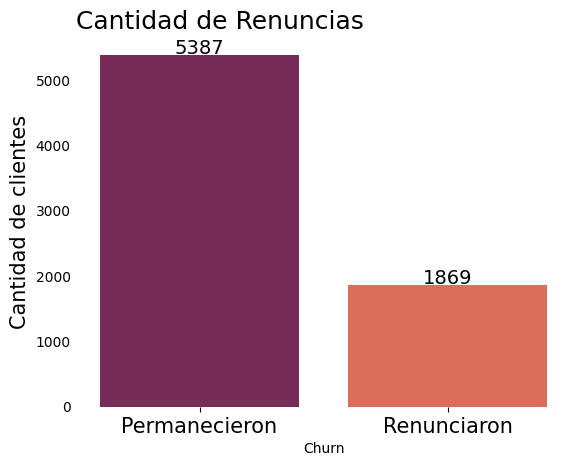

In [21]:
ax = sns.barplot(x=churn.index,y=churn.values, hue=churn.index,palette='rocket',legend=False)
ax.set_title('Cantidad de Renuncias',loc='left',fontsize=18)
ax.set_xticks([0,1],labels=['Permanecieron','Renunciaron'],fontsize=15)
ax.set_ylabel('Cantidad de clientes', fontsize=15)
ax.set_frame_on(False)
ax.tick_params(axis='y',which='both', size=0)


for i,j in enumerate(churn.values):
    ax.text(i,j+20,str(j),color='black',fontsize=14,ha='center')

plt.show()

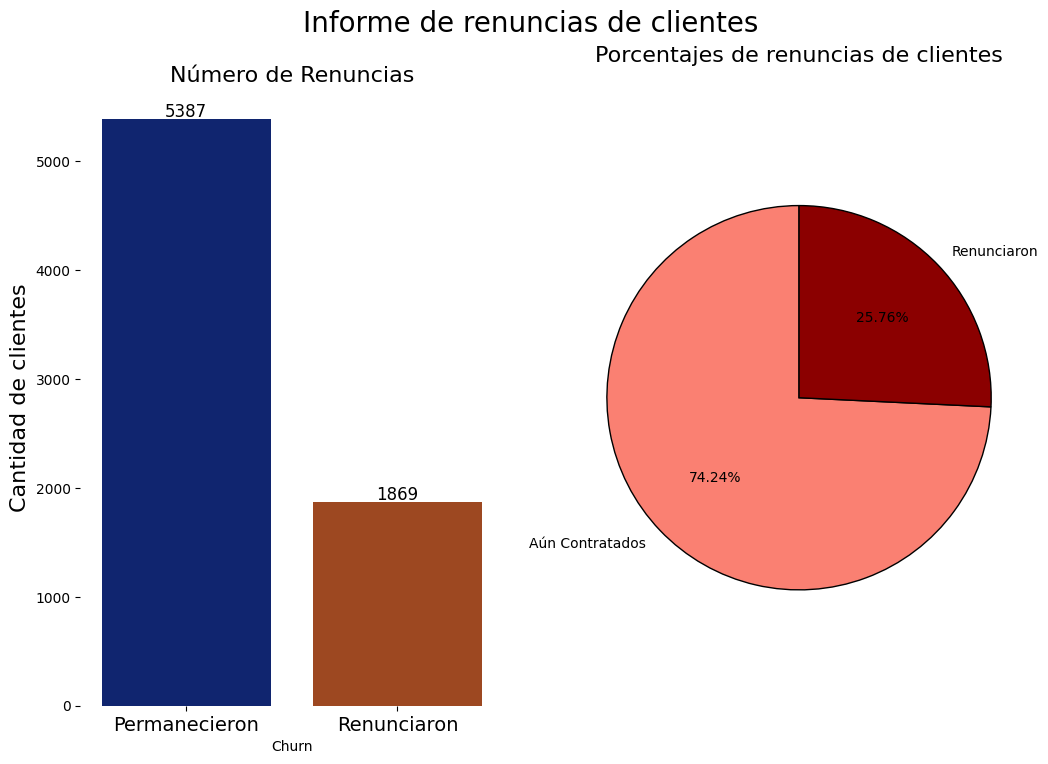

In [22]:
# En este paso, el objetivo es comprender c칩mo est치 distribuida la variable "churn" (evasi칩n) entre los clientes.
# Utiliza gr치ficos para visualizar la proporci칩n de clientes que permanecieron y los que se dieron de baja.
# Crear la figura y los subgr치ficos
fig, ax = plt.subplots(1,2,figsize=(12, 8))
fig.suptitle('Informe de renuncias de clientes', fontsize=20)
sns.barplot(x=churn.index,y=churn.values,hue=churn.index,ax=ax[0],legend=False, palette="dark")
ax[0].set_title('N칰mero de Renuncias', loc='center', fontsize=16)
ax[0].set_xticks([0,1],labels=['Permanecieron','Renunciaron'],fontsize=14)
ax[0].set_ylabel('Cantidad de clientes', fontsize=16)
ax[0].set_frame_on(False)

for i,j in enumerate(churn.values):
    ax[0].text(i,j+20,str(j),color='black',fontsize=12,ha='center')

ax[1].pie(churn, labels=('A칰n Contratados','Renunciaron'), autopct='%1.2f%%', startangle=90, colors=('Salmon','DarkRed'), wedgeprops={'edgecolor': 'black'})
ax[1].set_title('Porcentajes de renuncias de clientes', fontsize=16,pad=20)
ax[1].axis('equal')

fig.savefig('renuncias_telecomX.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()

In [23]:
# como g칠nero, tipo de contrato, m칠todo de pago, entre otras.
# ciertos perfiles tienen una mayor tendencia a cancelar el servicio,
# lo que ayudar치 a orientar acciones estrat칠gicas.

### **Datos genero**

In [24]:
generos = df_normalizado['Genero'].value_counts()
generos

Genero
Male      3669
Female    3587
Name: count, dtype: int64

### **Grafico genero**

In [25]:
grafico_genero = sns.barplot(x=generos.values,y=generos.index, palette='pastel',hue=generos.index)
grafico_genero.set(title='Generos de las personas que han\ncontratado',xlabel='Numero de Personas')
grafico_genero.set_frame_on(False)
for i, j in enumerate(generos):
  grafico_genero.text(j+20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')
plt.show()

### **Datos tipos de contrato**

In [26]:
# Tipo de contrato
tipos_contrato = df_normalizado['Contrato'].value_counts()
tipos_contrato

Contrato
month-to-month    4005
two year          1733
one year          1518
Name: count, dtype: int64

### **Gr치fico tipo de Contratos**

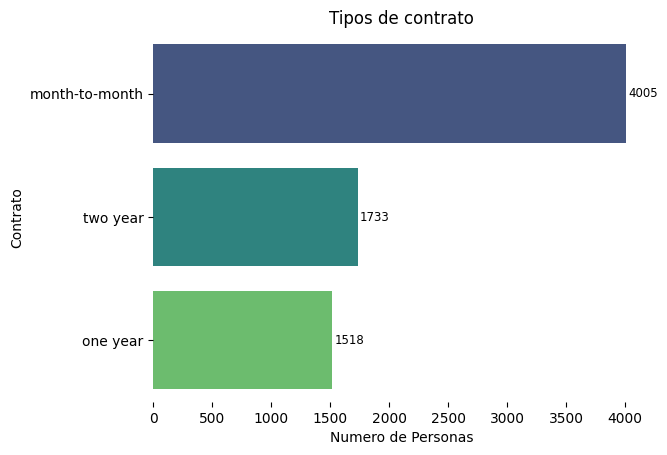

In [27]:
grafico_contrato = sns.barplot(x=tipos_contrato.values,y=tipos_contrato.index, hue=tipos_contrato.index, palette='viridis', legend=False)
grafico_contrato.set(title='Tipos de contrato',xlabel='Numero de Personas')
grafico_contrato.set_frame_on(False)
for i, j in enumerate(tipos_contrato):
  grafico_contrato.text(j+20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')
plt.show()

#### **Datos m칠todo de pago**

In [28]:
# m칠todo de pago
metodo_pago = df_normalizado['Metodo.pago'].value_counts()
metodo_pago

Metodo.pago
Electronic check    2445
Mailed check        1657
Bank transfer       1587
Credit card         1567
Name: count, dtype: int64

### **Gr치fico m칠todo de pagos**

In [29]:
grafico_metodo = sns.barplot(x=metodo_pago.values,y=metodo_pago.index, hue=metodo_pago.index, palette='Set2', legend=False)
grafico_metodo.set(title='Metodos de pagos de\nlas personas',xlabel='Numero de Personas')
grafico_metodo.set_frame_on(False)
for i, j in enumerate(metodo_pago):
  grafico_metodo.text(j+20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')
plt.show()

## **Subplots de los datos**

In [33]:
# Subplots para las variables categ칩ricas m치s relevantes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gr치fico de g칠nero
sns.barplot(x=generos.values, y=generos.index, hue=generos.index, palette='pastel', legend=False, ax=axes[0])
axes[0].set_title('G칠neros de las personas que han\ncontratado')
axes[0].set_xlabel('N칰mero de Personas')
axes[0].set_frame_on(False)
for i, j in enumerate(generos):
  axes[0].text(j + 20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')

# Gr치fico de tipo de contrato
sns.barplot(x=tipos_contrato.values, y=tipos_contrato.index, hue=tipos_contrato.index, palette='viridis', legend=False, ax=axes[1])
axes[1].set_title('Tipos de contrato')
axes[1].set_xlabel('N칰mero de Personas')
axes[1].set_frame_on(False)
for i, j in enumerate(tipos_contrato):
  axes[1].text(j + 20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')

# Gr치fico de m칠todo de pago
sns.barplot(x=metodo_pago.values, y=metodo_pago.index, hue=metodo_pago.index, palette='Set2', legend=False, ax=axes[2])
axes[2].set_title('M칠todos de pagos de\nlas personas')
axes[2].set_xlabel('N칰mero de Personas')
axes[2].set_frame_on(False)
for i, j in enumerate(metodo_pago):
  axes[2].text(j + 20, i, str(j), color='black', fontsize=8.5, ha='left', va='center')

plt.tight_layout()
plt.show()

## **Conteo de evasi칩n n칰mericas**

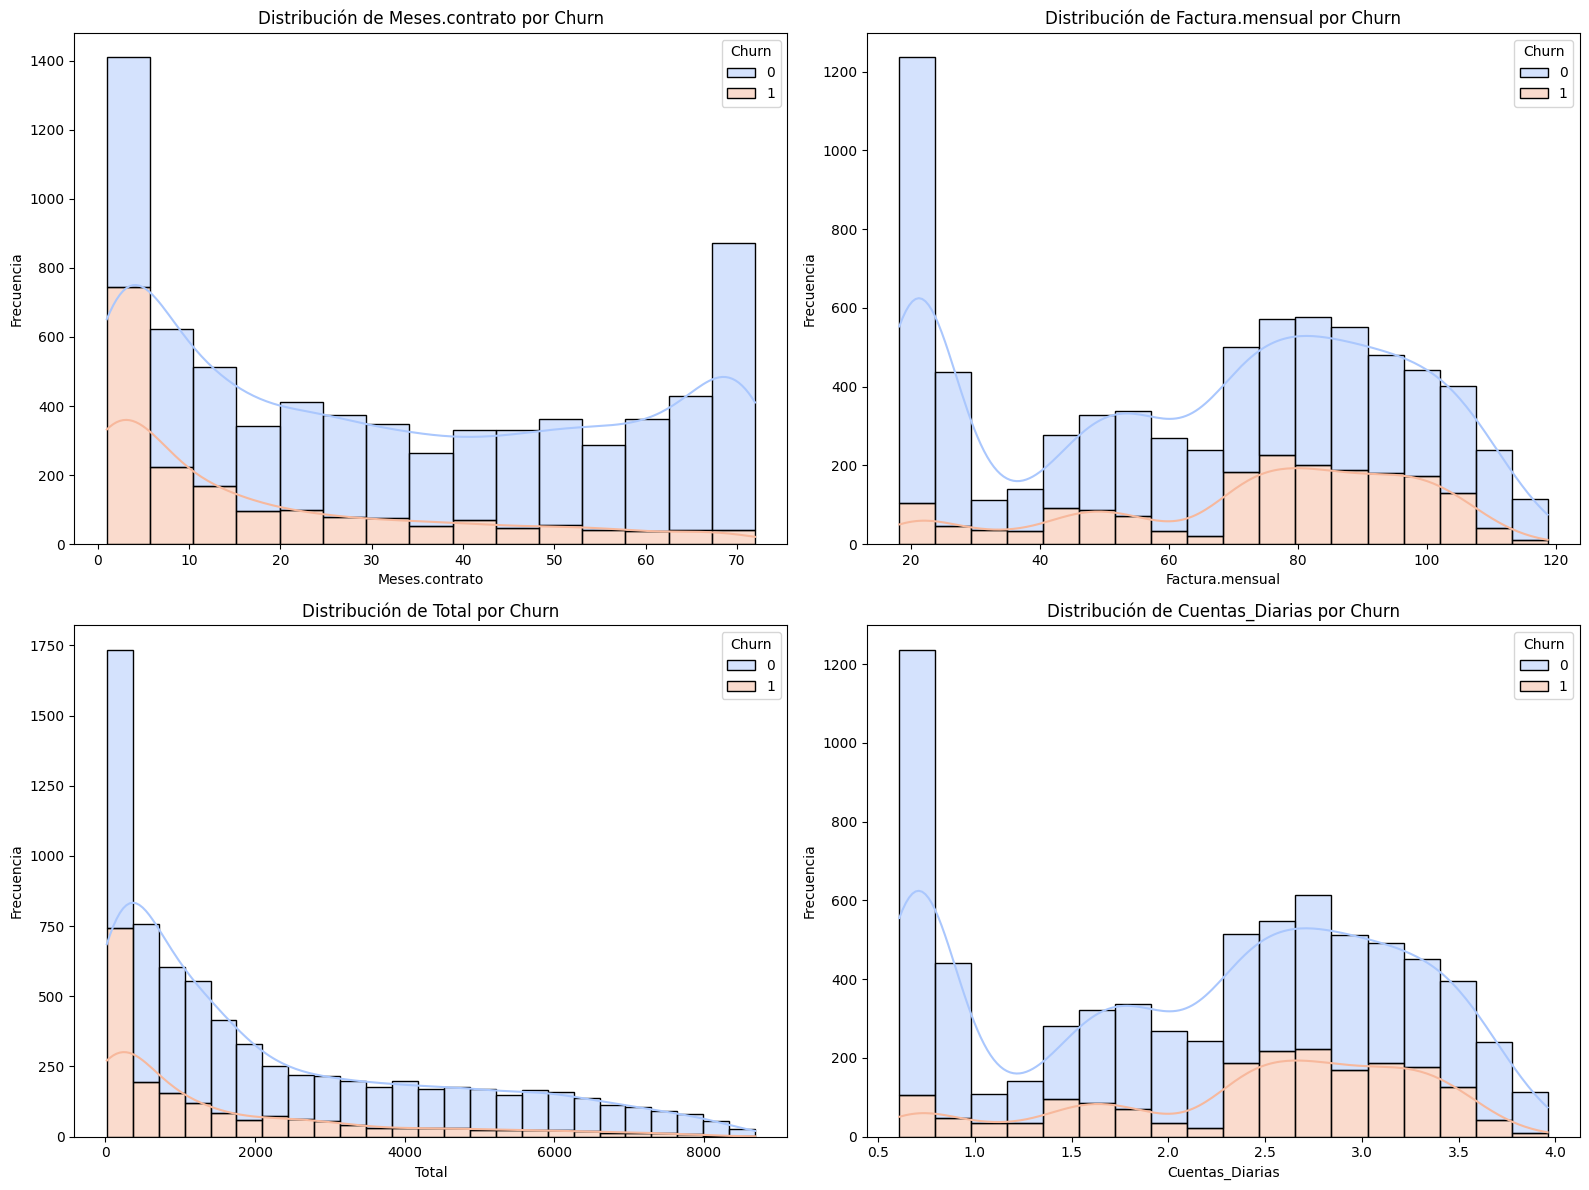

In [41]:
# An치lisis de la distribuci칩n de variables num칠ricas entre clientes que cancelaron y no cancelaron

# Variables num칠ricas a analizar
numeric_cols = ['Meses.contrato', 'Factura.mensual', 'Total', 'Cuentas_Diarias']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_normalizado, x=col, hue='Churn', multiple='stack', kde=True, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Distribuci칩n de {col} por Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#游늯Informe final

### 游댳 Introducci칩n

El presente informe detalla el an치lisis realizado sobre los datos de clientes de TelecomX con el objetivo de comprender el fen칩meno de la evasi칩n de clientes, conocido como "Churn". La evasi칩n de clientes representa una p칠rdida significativa de ingresos para las empresas de telecomunicaciones, por lo que identificar a los clientes propensos a abandonar el servicio y comprender las razones detr치s de su decisi칩n es crucial para implementar estrategias de retenci칩n efectivas. Este an치lisis busca identificar patrones y caracter칤sticas de los clientes que renuncian para minimizar la tasa de Churn.

### 游댳 Limpieza y Tratamiento de Datos

El an치lisis comenz칩 con la importaci칩n de los datos del archivo JSON `TelecomX_Data.json` desde un repositorio de GitHub. Los datos fueron cargados en un DataFrame de pandas para su posterior procesamiento.

Los pasos de limpieza y tratamiento de datos incluyeron:
- **Normalizaci칩n:** Se utiliz칩 `pd.json_normalize` para aplanar la estructura del JSON anidado.
- **Tratamiento de valores faltantes y inconsistentes:**
    - Se reemplazaron los valores vac칤os en la columna 'Churn' por 'No'.
    - Se homogeneizaron los valores en 'phone.MultipleLines' y 'internet.InternetService'.
    - Se reemplazaron los valores 'No internet service' por 'No' en las columnas relevantes.
    - Se elimin칩 el texto "(automatic)" de la columna 'account.PaymentMethod'.
- **Conversi칩n de tipos de datos:**
    - La columna 'customer.tenure' se convirti칩 a tipo entero.
    - La columna 'account.Contract' se convirti칩 a min칰sculas.
    - Se eliminaron las filas donde 'account.Charges.Total' conten칤a espacios y luego se convirti칩 a tipo flotante.
- **Creaci칩n de nuevas variables:** Se calcul칩 la columna 'Cuentas_Diarias' dividiendo 'account.Charges.Monthly' por 30.
- **Conversi칩n a variables binarias:** Se transformaron varias columnas categ칩ricas con valores 'Yes'/'No' a 1/0 para facilitar el an치lisis cuantitativo.
- **Renombrado de columnas:** Se renombraron las columnas a nombres m치s descriptivos y legibles.

### 游댳 An치lisis Exploratorio de Datos

Se realiz칩 un an치lisis exploratorio de datos (EDA) para obtener informaci칩n sobre la distribuci칩n de los clientes y comprender los factores que podr칤an estar relacionados con la evasi칩n.

- **Distribuci칩n de Churn:** Se visualiz칩 la proporci칩n de clientes que renunciaron versus los que permanecieron utilizando gr치ficos de barras y de pastel. Esto mostr칩 que aproximadamente el 26.5% de los clientes en el conjunto de datos hab칤an renunciado.

- **An치lisis de variables categ칩ricas:** Se examin칩 la distribuci칩n de variables categ칩ricas clave como g칠nero, tipo de contrato y m칠todo de pago.
    - **G칠nero:** Se observ칩 una distribuci칩n casi equitativa entre hombres y mujeres.
    - **Tipo de contrato:** Los contratos mes a mes fueron los m치s frecuentes, seguidos por los contratos de dos a침os y luego los de un a침o.
    - **M칠todo de pago:** Los pagos electr칩nicos y por cheque por correo fueron los m칠todos m치s populares.

- **An치lisis de variables num칠ricas:** Se analizaron las distribuciones de las variables num칠ricas (Meses.contrato, Factura.mensual, Total, Cuentas_Diarias) en relaci칩n con la variable Churn.
    - **Meses de contrato (Tenure):** Los clientes que renunciaron tienden a tener un menor tiempo de contrato (tenure) en comparaci칩n con los que permanecieron. Esto sugiere que los nuevos clientes o aquellos con contratos a corto plazo son m치s propensos a irse.
    - **Factura mensual (Monthly Charges):** Los clientes que renunciaron tienden a tener facturas mensuales m치s altas. Esto podr칤a indicar que los clientes con costos m치s elevados son m치s sensibles al precio o no perciben un valor proporcional.
    - **Total (Total Charges):** Los clientes que permanecieron tienen un total de cargos acumulados significativamente mayor, lo cual es coherente con su mayor tiempo de permanencia.
    - **Cuentas Diarias:** Al igual que la factura mensual, los clientes que renunciaron tienden a tener cuentas diarias m치s altas.

### 游댳 Conclusiones e Insights

Basado en el an치lisis exploratorio, se pueden extraer las siguientes conclusiones e insights:

- **El Churn es un problema relevante:** Aproximadamente uno de cada cuatro clientes abandona la empresa, lo que justifica la necesidad de estrategias de retenci칩n.
- **La antig칲edad del cliente es un factor clave:** Los clientes m치s nuevos son m치s propensos a renunciar. Enfocar los esfuerzos de retenci칩n en los primeros meses de servicio podr칤a ser efectivo.
- **Los costos elevados parecen ser un factor de riesgo:** Los clientes con facturas mensuales m치s altas tienen una mayor tendencia a renunciar. Esto podr칤a estar relacionado con la percepci칩n del valor del servicio o la sensibilidad al precio.
- **Los contratos a corto plazo presentan mayor riesgo:** Los clientes con contratos mes a mes tienen una tasa de churn m치s alta en comparaci칩n con aquellos con contratos m치s largos (uno o dos a침os).
- **El g칠nero, por s칤 solo, no parece ser un factor discriminatorio:** La distribuci칩n de Churn por g칠nero es similar.

### 游댳 Recomendaciones

Basado en los hallazgos de este an치lisis, se proponen las siguientes recomendaciones estrat칠gicas para reducir la evasi칩n de clientes:

1.  **Implementar un programa de bienvenida y seguimiento intensivo para nuevos clientes:** Dado que los clientes con bajo tenure son m치s propensos a renunciar, es crucial ofrecer un soporte proactivo y asegurar que tengan una experiencia positiva durante los primeros meses.
2.  **Analizar y optimizar la estructura de precios:** Investigar si los clientes con facturas mensuales altas sienten que el servicio no justifica el costo. Considerar ofrecer planes o paquetes que se ajusten mejor a las necesidades de estos clientes, o comunicar de manera m치s efectiva el valor de los servicios ofrecidos.
3.  **Incentivar contratos de mayor duraci칩n:** Promover los contratos de uno o dos a침os mediante descuentos, beneficios adicionales o programas de fidelidad para reducir la propensi칩n al Churn asociada a los contratos mes a mes.
4.  **Segmentar a los clientes de alto riesgo:** Utilizar los insights de este an치lisis para identificar a los clientes con mayor probabilidad de renunciar (por ejemplo, nuevos clientes con facturas altas y contratos mes a mes) y dirigirles ofertas de retenci칩n personalizadas.
5.  **Realizar encuestas de salida o seguimiento a los clientes que renunciaron:** Obtener feedback directo de los clientes que se fueron para comprender las razones espec칤ficas de su decisi칩n y mejorar continuamente la oferta y el servicio.

Este an치lisis proporciona una base s칩lida para comprender el Churn en TelecomX. La implementaci칩n de estas recomendaciones, junto con un monitoreo continuo y an치lisis m치s profundos, puede ayudar a reducir la tasa de evasi칩n y mejorar la retenci칩n de clientes.